In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [6]:
# 1 导入数据
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(60000, 28, 28)


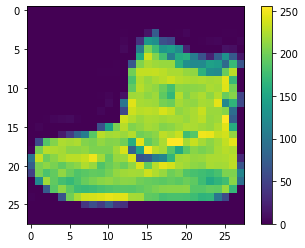

In [8]:
print(train_images.shape)
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
# 2 数据处理 minmax归一化
train_images = train_images / 255.0

test_images = test_images / 255.0

In [10]:
# 3.1 定义模型
# 该网络的第一层 tf.keras.layers.Flatten 将图像格式从二维数组（28 x 28 像素）转换成一维数组（28 x 28 = 784 像素）。将该层视为图像中未堆叠的像素行并将其排列起来。该层没有要学习的参数，它只会重新格式化数据。
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [11]:
# 3.3选择损失函数、3.5优化器和4评估方法
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
# 3训练模型
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6235 - accuracy: 0.7828
Epoch 2/10
1875/1875 [==============================] - 2s 973us/step - loss: 0.3905 - accuracy: 0.8593
Epoch 3/10
1875/1875 [==============================] - 2s 946us/step - loss: 0.3390 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3168 - accuracy: 0.8837
Epoch 5/10
1875/1875 [==============================] - 2s 958us/step - loss: 0.2909 - accuracy: 0.8937
Epoch 6/10
1875/1875 [==============================] - 2s 899us/step - loss: 0.2794 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2608 - accuracy: 0.9021
Epoch 8/10
1875/1875 [==============================] - 2s 953us/step - loss: 0.2517 - accuracy: 0.9068
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2427 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - l

In [13]:
# 评估模型
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3427 - accuracy: 0.8774

Test accuracy: 0.8773999810218811


$$
Softmax = \frac{e^{v_i}}{\sum e^{v_i}}
$$

In [19]:
# 5直接使用，进行预测
pre = model(test_images)
# 5添加softmax层进行预测
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
pre2 = probability_model(test_images)

In [24]:
# 这里输出的结果，因为模型最后一层有十个输出，这里输出了每一个
# print(pre[:10])
print(np.argmax(pre2[0]))
print(test_labels[:10])

9
[9 2 1 1 6 1 4 6 5 7]
